<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/287_tracking_particles_using_trackpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to install trackpy in colab and get started with tracking particles/objects**

https://youtu.be/yh_nRTkh9xo

Trackpy installation: http://soft-matter.github.io/trackpy/dev/installation.html

Trackpy strongly recommends using Conda and not pip. Therefore, we need to set up conda environment for our colab notebook. 

This specific topic has been covered in a separate tutorial: https://youtu.be/v4qskw8EHXQ

For more examples of trackpy and to download sample data sets: https://github.com/soft-matter/trackpy-examples

Let us start by understanding the current python version in our colab and installing the corresponding conda environment. 

In [1]:
!which python
!python --version

/Users/vschastlivaia/anaconda3/bin/python


Python 3.11.7


It gives python 3.7.13.
https://docs.conda.io/en/latest/miniconda.html#system-requirements
The documentation recommends miniconda 4.12.0 for python 3.7 Linux 64 bit

Let us reset the default python path for colab. Just to make sure we do not run into any issues later when miniconda installs its own version of python. 

In [28]:
#!echo $PYTHONPATH

In [29]:
#%env PYTHONPATH=

In [30]:
#%%bash
#MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
#MINICONDA_PREFIX=/usr/local
#wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
#chmod +x $MINICONDA_INSTALLER_SCRIPT
#./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

Verify to see if the conda executable is available

In [2]:
!which conda # should return /usr/local/bin/conda

/Users/vschastlivaia/anaconda3/bin/conda


Confirm the conda version

In [3]:
!conda --version # should return 23.7.4

conda 23.11.0


Update conda

In [33]:
#%%bash
#conda install --channel defaults conda python=3.7 --yes
#conda update --channel defaults --all --yes

In [34]:
#!conda --version 

conda 23.11.0


In [35]:
!python --version

Python 3.11.7


Provide directory where site packages are installed within miniconda

First, check the current paths.

In [36]:
#import sys
#sys.path

Now add the path for our site-packages

In [37]:
#import sys
#_ = (sys.path
#        .append("/usr/local/lib/python3.7/site-packages"))

Now, we are all set to install trackpy library using conda.

Please note that you will be prompted to answer Yes/No a couple of times.

In [38]:
#%conda install -c conda-forge trackpy
#%conda install -c conda-forge pims


http://soft-matter.github.io/trackpy/v0.5.0/tutorial/walkthrough.html

Import the required libraries

In [10]:
#from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
#%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

Make sure to upload your data to Google Drive and mount the drive to make it accessible via your colab notebook.

Load the time series image folder with multiple images or single movie file or tiff stack. 

We will be using this data set:
https://github.com/soft-matter/trackpy-examples/tree/master/sample_data/bulk_water

In [4]:
#To read single tiff stack
# To read standard files, including tiff stacks, we can use pims.open
#frames_single_tiff=pims.open('/content/drive/MyDrive/ColabNotebooks/data/tracking_data/bulk_water/bulk_water.tif')
#frames_single_tiff

In [5]:
#To read multiple images from a directory
#Also, let us convert the images to grey by just using the green channel image
#We can also use built in method: pims.as_grey
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

frames = gray(pims.open('/Users/vschastlivaia/Library/CloudStorage/GoogleDrive-ginger.spacetail@gmail.com/My Drive/_Molecular Bionics Group/Scripts and experiments/Trajectories tracking/trackpy-examples-master/sample_data/bulk_water/*.png'))

In [ ]:
frames

(ImageSequence,) processed through proc_func. Original repr:
    <Frames>
    Source: /content/drive/MyDrive/ColabNotebooks/data/tracking_data/bulk_water/individual_png/*.png
    Length: 300 frames
    Frame Shape: (424, 640, 4)
    Pixel Datatype: uint8

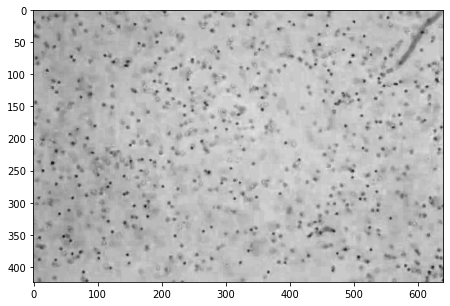

In [ ]:
plt.imshow(frames[0])

**Locating features**

This step performs segmentation using Gaussian blob detection. We can use our own segmentation, e.g, Deep Learning based. This will be covered in the next tutorial. 

For blob detection, estimate the size of features. Here, we are making an estimate of 11. 

The algorithm looks for bright features; since the features in this set of images are dark, we set invert=True.



In [6]:
f = tp.locate(frames[0], 11, invert=True)

locate returns a spreadsheet-like object called a DataFrame. It lists each feature's position,
various characterizations of its appearance, which we will use to filter out spurious features,
the "signal" strength and an estimate of uncertainty, both derived from this paper: https://www.cell.com/biophysj/fulltext/S0006-3495(05)73136-2

In [7]:
f.head()  # shows the first few rows of data

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,4.750000,103.668564,192.862485,2.106615,0.066390,10.808405,10714.0,0.073666,0
1,5.249231,585.779487,164.659302,2.962674,0.078936,4.222033,10702.0,0.075116,0
2,5.785986,294.792544,244.624615,2.244542,0.219217,15.874846,10686.0,0.077141,0
3,5.869369,338.173423,187.458282,2.046201,0.185333,13.088304,10554.0,0.099201,0
4,6.746377,310.584169,151.486558,3.103294,0.053342,4.475355,10403.0,0.147430,0


You can use tp.annotate to display the objects that we will be tracking.

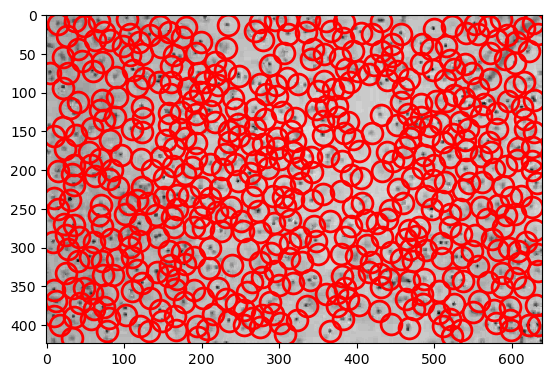

<Axes: >

In [8]:
tp.annotate(f, frames[0])

Plot object areas to investigate the distribution. You can further filter out objects based on size or intensity.

In trackpy, the brightness is referred to as 'mass'. Let us plot mass to identify any outliers. 

[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

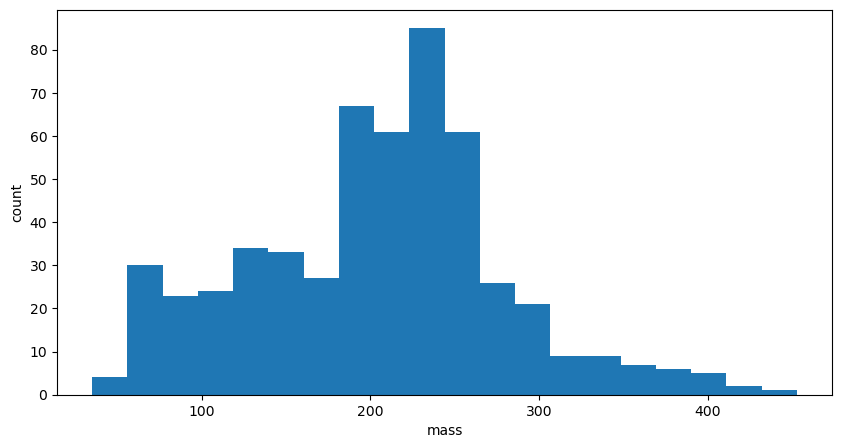

In [11]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

We can filter based on threshold or also by defining minimum or maximum mass (brightness). Let us filter all blobs below a mass of 20.

In [12]:
f = tp.locate(frames[0], 11, invert=True, minmass=20)

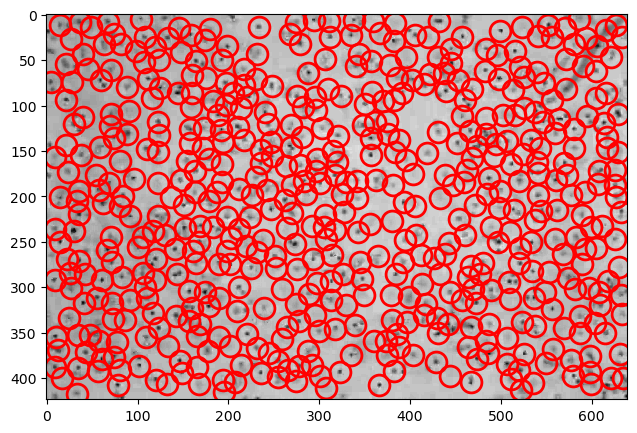

In [13]:
tp.annotate(f, frames[0]);

**Locating (segmenting) features in all 300 frames**

We'll locate features in the first 300 frames from this video. We use tp.batch, which calls tp.locate on each frame and collects the results.

In [14]:
f = tp.batch(frames[:300], 11, minmass=20, invert=True)

Frame 299: 624 features


**Link features into particle trajectories**

We have the locations of the particles in each frame. Next we'll track particles from frame to frame, giving each one a number for identification.

First, we must must specify a maximum displacement, the farthest a particle can travel between frames. We should choose the smallest reasonable value because a large value slows computation time considerably. In this case, 5 pixels is reasonable.

Second, we allow for the possibility that a particle might be missed for a few frames and then seen again. (Perhaps its "mass" slipped below our cutoff due to noise in the video.) Memory keeps track of disappeared particles and maintains their ID for up to some number of frames after their last appearance. Here we use 3 frames.

In [15]:
t = tp.link(f, 5, memory=3)

Frame 299: 624 trajectories present.


In [30]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,4.750000,103.668564,192.862485,2.106615,0.066390,10.808405,10714.0,0.073666,0,0
365,284.118980,25.313881,149.037779,2.321961,0.031799,7.008575,10770.0,0.067577,0,1
364,282.753601,534.788476,222.754482,1.908443,0.103416,15.874846,10415.0,0.141946,0,2
363,280.010398,275.185353,186.782757,2.508665,0.183181,7.261897,10438.0,0.132499,0,3
362,279.134153,252.780324,151.064355,2.938060,0.253812,4.306474,10359.0,0.171764,0,4


**Filter spurious trajectories**

We have more filtering to do. Ephemeral trajectories — seen only for a few frames — are usually spurious and never useful. The convenience function filter_stubs keeps only trajectories that last for a given number of frames.

In [31]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 13715
After: 1505


We can also filter trajectories by their particles' appearance. At this stage, with trajectories linked, we can look at a feature's "average appearance" throughout its trajectory, giving a more accurate picture.



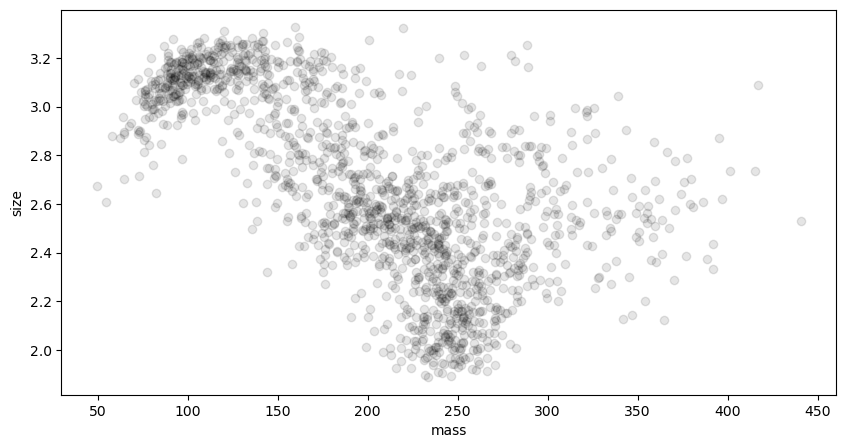

In [32]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

The particles with especially low mass, or that are especially large or non-circular (eccentric), are probably out of focus or aggregated, respectively. It is best to experiment by trial and error, filtering out regions of mass-size space and looking at the results using tp.annotate. In the end, we need to separate the good particles from the spurious ones, and it doesn't matter how we get it done.

In [33]:
t2 = t1[((t1['mass'] > 50) & (t1['size'] < 2.6) &
         (t1['ecc'] < 0.3))]

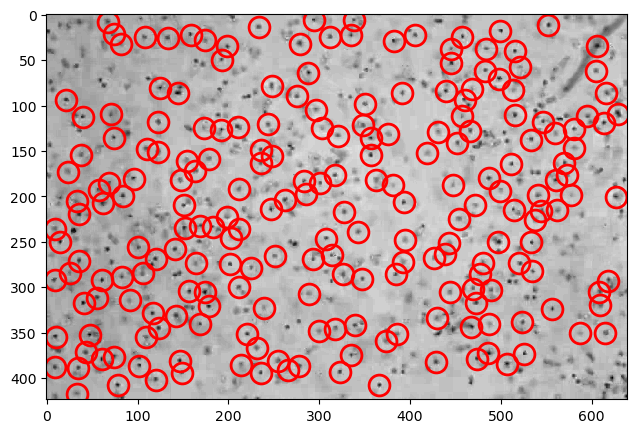

In [20]:
plt.figure()
tp.annotate(t2[t2['frame'] == 0], frames[0]);

Trace the trajectories using plot_traj():

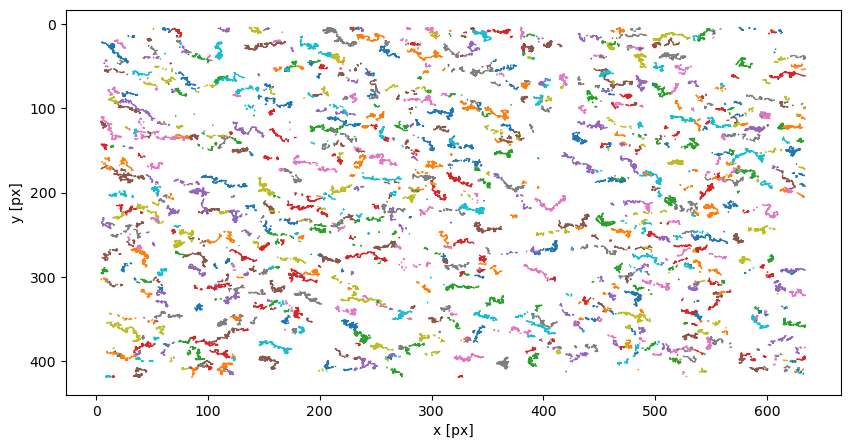

<Axes: xlabel='x [px]', ylabel='y [px]'>

In [21]:
plt.figure()
tp.plot_traj(t2)

Compute the overall drifting motion, which we will subtract away, adopting the reference frame of the particles' average position.

In [34]:
d = tp.compute_drift(t2)

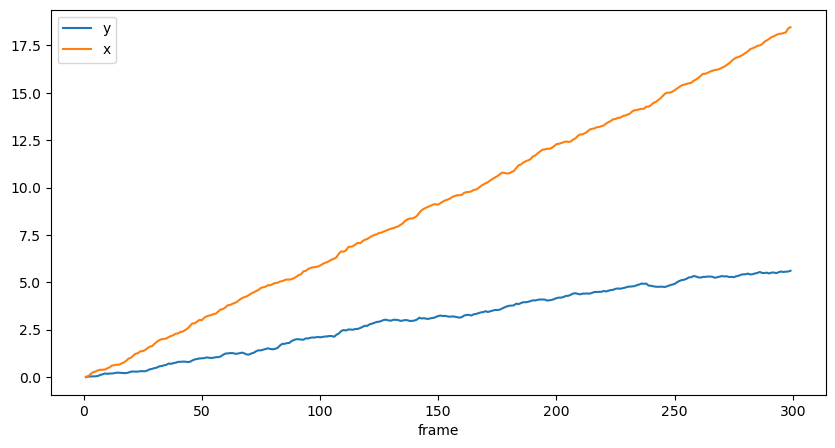

In [35]:
d.plot()
plt.show()

Subtract the drift

In [36]:
tm = tp.subtract_drift(t2.copy(), d)

Plot the trajectories again

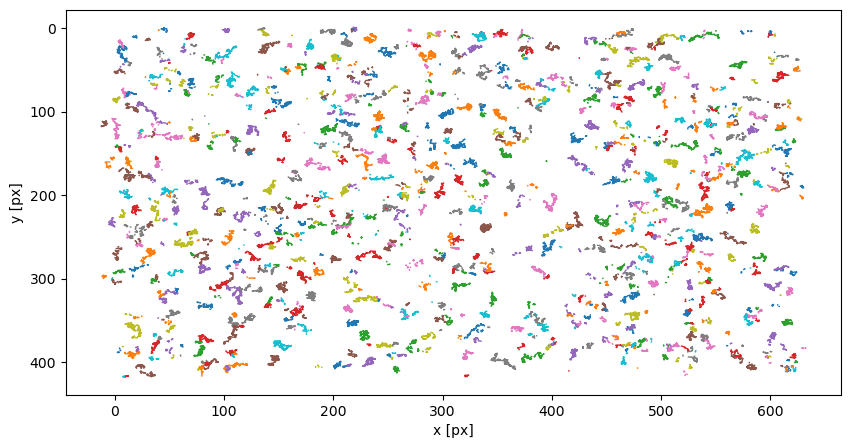

In [37]:
ax = tp.plot_traj(tm)
plt.show()

# **Analyze trajectories**

**Mean Squared Displacement of Individal Probes**

Compute the mean squared displacement (MSD) of each particle using the imsd function, and plot MSD vs. lag time.

In [41]:
im = tp.imsd(tm, 100/285., 24)  # microns per pixel = 100/285., frames per second = 24


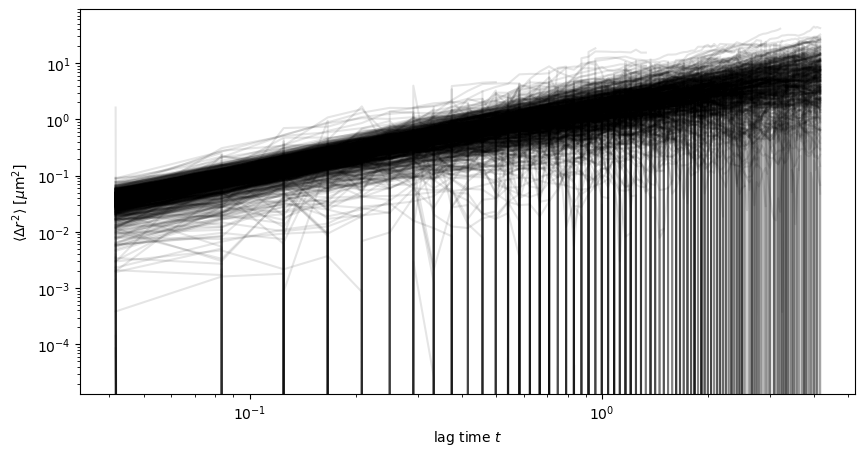

In [39]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

**Ensemble Mean Squared Displacement**

Now use the emsd function to compute the ensemble mean squared displacement (EMSD) of all particles:

In [40]:
em = tp.emsd(tm, 100/285., 24) # microns per pixel = 100/285., frames per second = 24

TypeError: mean() got an unexpected keyword argument 'level'

NameError: name 'em' is not defined

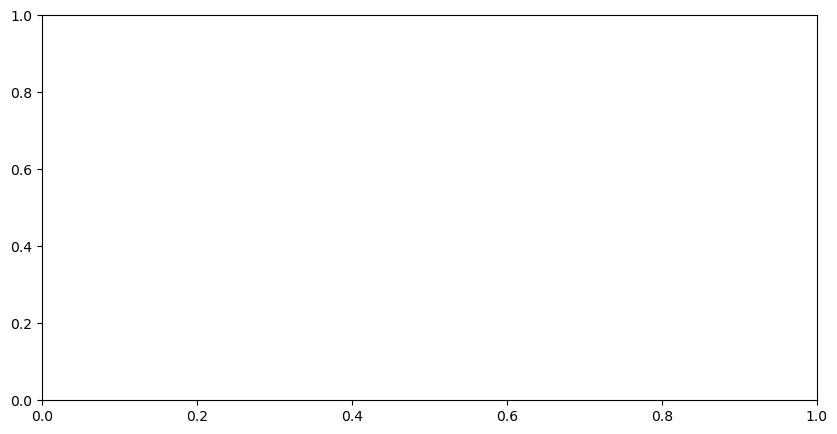

In [42]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 10));

We can easily fit this ensemble mean-squared displacement to a power law, , using a convenience function, fit_powerlaw, which performs a linear regression in log space.

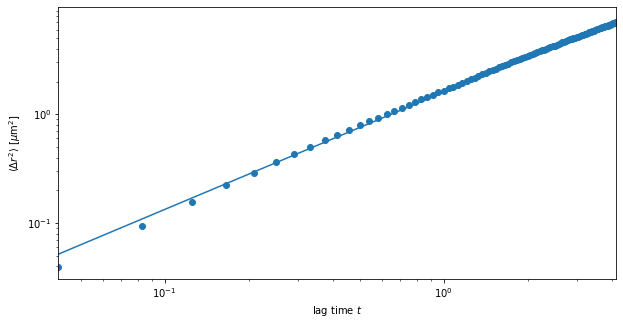

,n,A
msd,1.0787,1.595089


In [ ]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots]